# ROC Curves

## Get filenames
To see if results of different folds are significant


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Change current directory to the folder containing your CSV file
os.chdir('/content/drive/MyDrive/_Masterarbeit/results')

# Verify the current directory
print(os.getcwd())

/content/drive/MyDrive/_Masterarbeit/results


In [4]:
ls -l

total 538
drwx------ 2 root root   4096 May 19 06:40 results/
-rw------- 1 root root 483330 May 20 19:03 results_ROC_curves.ipynb
-rw------- 1 root root  30832 May 31 08:55 results_statistic_test2.ipynb
-rw------- 1 root root  30832 May 20 17:50 results_statistic_test.ipynb


# Get TPR and FPR

In [5]:
def get_array(column):
  """take array from pandas dataframe, clean up and convert to numpy array"""
  string = column[0] # Extract the string from the nested list
  # Remove the brackets, newlines, and split into a list of numbers
  numbers = string.replace('[', '').replace(']', '').replace('\n', ' ').split()
  result = [float(num) for num in numbers] # Convert the strings to floats
  #return result
  array = arr = np.asarray(result)
  return array

In [6]:
def get_stacked_array_book(book):
  """Get stacked array with tpr and fpr for book crtierium (4 folds)"""
  book_tpr0 = get_array(book['fold0_tpr'])
  book_tpr1 = get_array(book['fold1_tpr'])
  book_tpr2 = get_array(book['fold2_tpr'])
  book_tpr3 = get_array(book['fold3_tpr'])
  book_fpr0 = get_array(book['fold0_fpr'])
  book_fpr1 = get_array(book['fold1_fpr'])
  book_fpr2 = get_array(book['fold2_fpr'])
  book_fpr3 = get_array(book['fold3_fpr'])
  tpr_values = np.array([book_tpr0, book_tpr1, book_tpr2, book_tpr3])
  fpr_values = np.array([book_fpr0, book_fpr1, book_fpr2, book_fpr3])
  return tpr_values, fpr_values

In [7]:
def get_stacked_array(criterium):
  """Get stacked array with tpr and fpr for subj & book-page crtierium (5 folds)"""
  tpr0 = get_array(criterium['fold0_tpr'])
  tpr1 = get_array(criterium['fold1_tpr'])
  tpr2 = get_array(criterium['fold2_tpr'])
  tpr3 = get_array(criterium['fold3_tpr'])
  tpr4 = get_array(criterium['fold4_tpr'])
  fpr0 = get_array(criterium['fold0_fpr'])
  fpr1 = get_array(criterium['fold1_fpr'])
  fpr2 = get_array(criterium['fold2_fpr'])
  fpr3 = get_array(criterium['fold3_fpr'])
  fpr4 = get_array(criterium['fold4_fpr'])
  tpr_values = np.array([tpr0, tpr1, tpr2, tpr3, tpr4])
  fpr_values = np.array([fpr0, fpr1, fpr2, fpr3, fpr4])
  return tpr_values, fpr_values

## Get data

In [8]:
# get data
# example: SBSAT/s1_rm1_lf1/sbsat_splits_s1_rm1_lf1_book-page_binary_score_64_tanh.csv
dataset = ['InDiCo', 'SBSAT']
versions = ['s1_rm1_lf1', 's1_rm1_lf0', 's1_rm1_lf1_pos_cont', 's1_rm0_lf0', 's0_rm1_lf0', 's0_rm0_lf1']
criteria = ['book-page', 'subj', 'book']

all_data = {}
for d in dataset: 
  for v in versions: 
    file_data = {}
    
    for c in criteria: 
      filename = d.lower() + "_splits_" + v + "_" + c + "_binary_score_64_tanh.csv"
      path = os.path.join("results", d, v, filename)
      file_data[c+'_path'] = path
      

    df_book_page = pd.read_csv(file_data['book-page_path'])
    df_book = pd.read_csv(file_data['book_path'])
    df_subj = pd.read_csv(file_data['subj_path'])
    file_data['tpr_page'] = get_stacked_array(df_book_page)[0]
    file_data['fpr_page'] = get_stacked_array(df_book_page)[1]
    file_data['tpr_subj'] = get_stacked_array(df_subj)[0]
    file_data['fpr_subj'] = get_stacked_array(df_subj)[1]
    file_data['tpr_book'] = get_stacked_array_book(df_book)[0]
    file_data['fpr_book'] = get_stacked_array_book(df_book)[1]

    all_data[(d, v)] = file_data

<ipython-input-7-7bce96e503c6>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tpr_values = np.array([tpr0, tpr1, tpr2, tpr3, tpr4])
<ipython-input-7-7bce96e503c6>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fpr_values = np.array([fpr0, fpr1, fpr2, fpr3, fpr4])
<ipython-input-6-d06917f93e9b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creatin

## Stony Brook Reading Dataset (SB-SAT)

In [9]:
# chose nested array of the different folds for each setting
dataset = "SBSAT"
# all features
version = 's1_rm1_lf1'
s1_rm1_lf1_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm1_lf1_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm1_lf1_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm1_lf1_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm1_lf1_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm1_lf1_fpr_book = all_data[(dataset, version)]['fpr_book']
# without linguistic features
version = 's1_rm1_lf0'
s1_rm1_lf0_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm1_lf0_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm1_lf0_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm1_lf0_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm1_lf0_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm1_lf0_fpr_book = all_data[(dataset, version)]['fpr_book']
# with reduced linguistic features (pos and content word)
version = 's1_rm1_lf1_pos_cont'
s1_rm1_lf1_pos_cont_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm1_lf1_pos_cont_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm1_lf1_pos_cont_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm1_lf1_pos_cont_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm1_lf1_pos_cont_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm1_lf1_pos_cont_fpr_book = all_data[(dataset, version)]['fpr_book']

# Ablation study
# only sequential data
# without linguistic features
version = 's1_rm0_lf0'
s1_rm0_lf0_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm0_lf0_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm0_lf0_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm0_lf0_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm0_lf0_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm0_lf0_fpr_book = all_data[(dataset, version)]['fpr_book']
# only reading measures
# without linguistic features
version = 's0_rm1_lf0'
s0_rm1_lf0_tpr_page = all_data[(dataset, version)]['tpr_page']
s0_rm1_lf0_fpr_page = all_data[(dataset, version)]['fpr_page']
s0_rm1_lf0_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s0_rm1_lf0_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s0_rm1_lf0_tpr_book = all_data[(dataset, version)]['tpr_book']
s0_rm1_lf0_fpr_book = all_data[(dataset, version)]['fpr_book']
# only linguistic features
# without linguistic features
version = 's0_rm0_lf1'
s0_rm0_lf1_tpr_page = all_data[(dataset, version)]['tpr_page']
s0_rm0_lf1_fpr_page = all_data[(dataset, version)]['fpr_page']
s0_rm0_lf1_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s0_rm0_lf1_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s0_rm0_lf1_tpr_book = all_data[(dataset, version)]['tpr_book']
s0_rm0_lf1_fpr_book = all_data[(dataset, version)]['fpr_book']

In [10]:
# arrays have different lengths because of early stopping (different no of epochs)
for t, f in zip(s1_rm1_lf1_tpr_page, s1_rm1_lf1_fpr_page): 
  print(t.shape, "\t", f.shape)

(206,) 	 (206,)
(184,) 	 (184,)
(199,) 	 (199,)
(178,) 	 (178,)
(172,) 	 (172,)


In [11]:
def get_mean_stdv(tpr_valuies, fpr_values):
  """Take nested arrays for fpr and tpr values of different folds, return mean and stdv for ROC curve"""
  max_length = max(len(t) for t in tpr_valuies)

  # Interpolate FPR and TPR lists to have max_length elements
  interpolated_tpr = [np.interp(np.linspace(0, 1, max_length), f, t) for t, f in zip(tpr_valuies, fpr_values)]
  interpolated_fpr = [np.linspace(0, 1, max_length) for _ in fpr_values]

  # Calculate the mean FPR and TPR values
  mean_tpr = np.mean(interpolated_tpr, axis=0)
  mean_fpr = np.mean(interpolated_fpr, axis=0)
  std_tpr = np.std(interpolated_tpr, axis=0)
  std_fpr = np.std(interpolated_tpr, axis=0)

  return mean_tpr, mean_fpr, std_tpr, std_fpr

In [12]:
# get mean of different folds and stdv for plot
# all features
mean_tpr_page, mean_fpr_page, std_tpr_page, std_fpr_page = get_mean_stdv(s1_rm1_lf1_tpr_page, s1_rm1_lf1_fpr_page)
mean_tpr_subj, mean_fpr_subj, std_tpr_subj, std_fpr_subj = get_mean_stdv(s1_rm1_lf1_tpr_subj, s1_rm1_lf1_fpr_subj)
mean_tpr_book, mean_fpr_book, std_tpr_book, std_fpr_book = get_mean_stdv(s1_rm1_lf1_tpr_book, s1_rm1_lf1_fpr_book)
# without linguistic features
mean_tpr_page_110, mean_fpr_page_110, std_tpr_page_110, std_fpr_page_110 = get_mean_stdv(s1_rm1_lf0_tpr_page, s1_rm1_lf0_fpr_page)
mean_tpr_subj_110, mean_fpr_subj_110, std_tpr_subj_110, std_fpr_subj_110 = get_mean_stdv(s1_rm1_lf0_tpr_subj, s1_rm1_lf0_fpr_subj)
mean_tpr_book_110, mean_fpr_book_110, std_tpr_book_110, std_fpr_book_110 = get_mean_stdv(s1_rm1_lf0_tpr_book, s1_rm1_lf0_fpr_book)
# reduced linguistic features (pos, content word)
mean_tpr_page_111_reduced, mean_fpr_page_111_reduced, std_tpr_page_111_reduced, std_fpr_page_111_reduced = get_mean_stdv(s1_rm1_lf1_pos_cont_tpr_page, s1_rm1_lf1_pos_cont_fpr_page)
mean_tpr_subj_111_reduced, mean_fpr_subj_111_reduced, std_tpr_subj_111_reduced, std_fpr_subj_111_reduced = get_mean_stdv(s1_rm1_lf1_pos_cont_tpr_subj, s1_rm1_lf1_pos_cont_fpr_subj)
mean_tpr_book_111_reduced, mean_fpr_book_111_reduced, std_tpr_book_111_reduced, std_fpr_book_111_reduced = get_mean_stdv(s1_rm1_lf1_pos_cont_tpr_book, s1_rm1_lf1_pos_cont_fpr_book)
# only sequential data
mean_tpr_page_100, mean_fpr_page_100, std_tpr_page_100, std_fpr_page_100 = get_mean_stdv(s1_rm0_lf0_tpr_page, s1_rm0_lf0_fpr_page)
mean_tpr_subj_100, mean_fpr_subj_100, std_tpr_subj_100, std_fpr_subj_100 = get_mean_stdv(s1_rm0_lf0_tpr_subj, s1_rm0_lf0_fpr_subj)
mean_tpr_book_100, mean_fpr_book_100, std_tpr_book_100, std_fpr_book_100 = get_mean_stdv(s1_rm0_lf0_tpr_book, s1_rm0_lf0_fpr_book)
# only reading measures
mean_tpr_page_010, mean_fpr_page_010, std_tpr_page_010, std_fpr_page_010 = get_mean_stdv(s0_rm1_lf0_tpr_page, s0_rm1_lf0_fpr_page)
mean_tpr_subj_010, mean_fpr_subj_010, std_tpr_subj_010, std_fpr_subj_010 = get_mean_stdv(s0_rm1_lf0_tpr_subj, s0_rm1_lf0_fpr_subj)
mean_tpr_book_010, mean_fpr_book_010, std_tpr_book_010, std_fpr_book_010 = get_mean_stdv(s0_rm1_lf0_tpr_book, s0_rm1_lf0_fpr_book)
# only linguistic features
mean_tpr_page_001, mean_fpr_page_001, std_tpr_page_001, std_fpr_page_001 = get_mean_stdv(s0_rm0_lf1_tpr_page, s0_rm0_lf1_fpr_page)
mean_tpr_subj_001, mean_fpr_subj_001, std_tpr_subj_001, std_fpr_subj_001 = get_mean_stdv(s0_rm0_lf1_tpr_subj, s0_rm0_lf1_fpr_subj)
mean_tpr_book_001, mean_fpr_book_001, std_tpr_book_001, std_fpr_book_001 = get_mean_stdv(s0_rm0_lf1_tpr_book, s0_rm0_lf1_fpr_book)

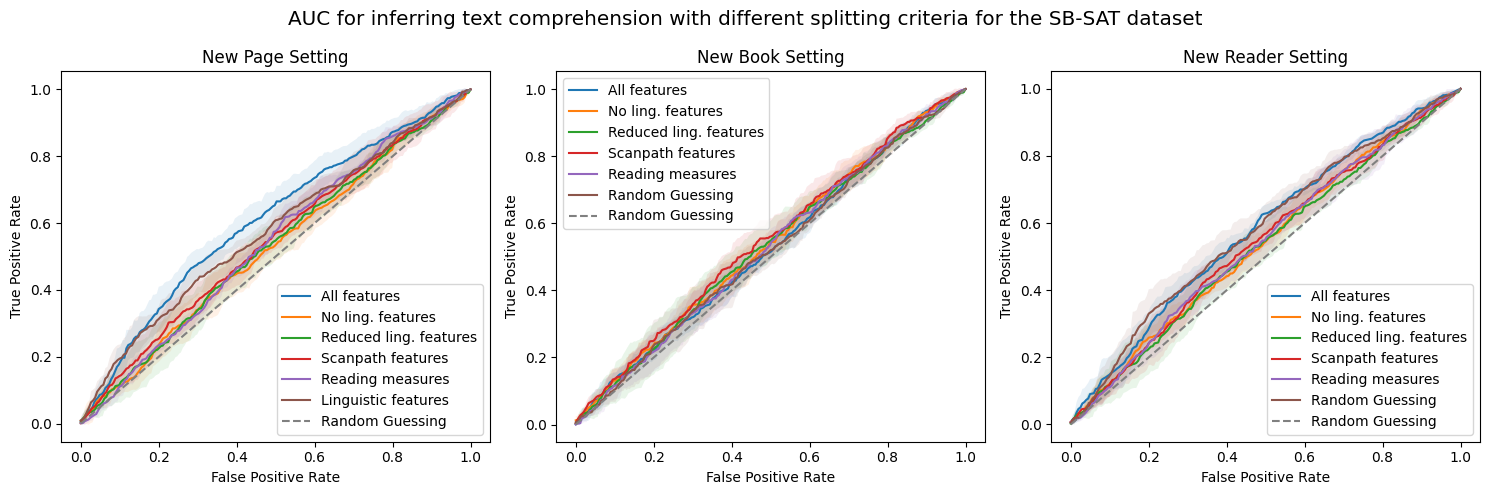

In [15]:
import matplotlib.pyplot as plt

# Create a figure with three subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
st = fig.suptitle("AUC for inferring text comprehension with different splitting criteria for the SB-SAT dataset", fontsize="x-large")

# Plot for page setting --------------------------
# all features
axs[0].fill_between(mean_fpr_page, mean_tpr_page - std_tpr_page, mean_tpr_page + std_tpr_page, alpha=0.1)
axs[0].plot(mean_fpr_page, mean_tpr_page, label='All features') # s1_rm1_lf1
# no linguistic features
axs[0].fill_between(mean_fpr_page_110, mean_tpr_page_110 - std_tpr_page_110, mean_tpr_page_110 + std_tpr_page_110, alpha=0.1)
axs[0].plot(mean_fpr_page_110, mean_tpr_page_110, label='No ling. features') # s1_rm1_lf0
# reduced linguistic features (pos, content word)
axs[0].fill_between(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced - std_tpr_subj_111_reduced, mean_tpr_subj_111_reduced + std_tpr_subj_111_reduced, alpha=0.1)
axs[0].plot(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced, label='Reduced ling. features') # s1_rm1_1_pos_cont
# only sequential data
axs[0].fill_between(mean_fpr_page_100, mean_tpr_page_100 - std_tpr_page_100, mean_tpr_page_100 + std_tpr_page_100, alpha=0.1)
axs[0].plot(mean_fpr_page_100, mean_tpr_page_100, label='Scanpath features') # s1_rm0_lf0
# only reading measures
axs[0].fill_between(mean_fpr_page_010, mean_tpr_page_010 - std_tpr_page_010, mean_tpr_page_010 + std_tpr_page_010, alpha=0.1)
axs[0].plot(mean_fpr_page_010, mean_tpr_page_010, label='Reading measures') # s0_rm1_lf0
# only linguistic features
axs[0].fill_between(mean_fpr_page_001, mean_tpr_page_001 - std_tpr_page_001, mean_tpr_page_001 + std_tpr_page_001, alpha=0.1)
axs[0].plot(mean_fpr_page_001, mean_tpr_page_001, label='Linguistic features') # s0_rm0_lf1
# random guessing
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('New Page Setting')
axs[0].legend()

# Plot for book setting ---------------------------------
# all features
axs[1].fill_between(mean_fpr_book, mean_tpr_book - std_tpr_book, mean_tpr_book + std_tpr_book, alpha=0.1)
axs[1].plot(mean_fpr_book, mean_tpr_book, label='All features')
# no linguistic features
axs[1].fill_between(mean_fpr_book_110, mean_tpr_book_110 - std_tpr_book_110, mean_tpr_book_110 + std_tpr_book_110, alpha=0.1)
axs[1].plot(mean_fpr_book_110, mean_tpr_book_110, label='No ling. features')
# reduced linguistic features (pos, content word)
axs[1].fill_between(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced - std_tpr_subj_111_reduced, mean_tpr_subj_111_reduced + std_tpr_subj_111_reduced, alpha=0.1)
axs[1].plot(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced, label='Reduced ling. features')
# only sequential data
axs[1].fill_between(mean_fpr_book_100, mean_tpr_book_100 - std_tpr_book_100, mean_tpr_book_100 + std_tpr_book_100, alpha=0.1)
axs[1].plot(mean_fpr_book_100, mean_tpr_book_100, label='Scanpath features')
# only reading measures
axs[1].fill_between(mean_fpr_book_010, mean_tpr_book_010 - std_tpr_book_010, mean_tpr_book_010 + std_tpr_book_010, alpha=0.1)
axs[1].plot(mean_fpr_book_010, mean_tpr_book_010, label='Reading measures')
# only linguistic features
axs[1].fill_between(mean_fpr_book_001, mean_tpr_book_001 - std_tpr_book_001, mean_tpr_book_001 + std_tpr_book_001, alpha=0.1)
axs[1].plot(mean_fpr_book_001, mean_tpr_book_001, label='Random Guessing')
# random guessing
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('New Book Setting')
axs[1].legend()

# Plot for subj setting -----------------------------
# all features
axs[2].fill_between(mean_fpr_subj, mean_tpr_subj - std_tpr_subj, mean_tpr_subj + std_tpr_subj, alpha=0.1)
axs[2].plot(mean_fpr_subj, mean_tpr_subj, label='All features')
# no linguistic features
axs[2].fill_between(mean_fpr_subj_110, mean_tpr_subj_110 - std_tpr_subj_110, mean_tpr_subj_110 + std_tpr_subj_110, alpha=0.1)
axs[2].plot(mean_fpr_subj_110, mean_tpr_subj_110, label='No ling. features')
# reduced linguistic features (pos, content word)
axs[2].fill_between(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced - std_tpr_subj_111_reduced, mean_tpr_subj_111_reduced + std_tpr_subj_111_reduced, alpha=0.1)
axs[2].plot(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced, label='Reduced ling. features')
# only sequential data
axs[2].fill_between(mean_fpr_subj_100, mean_tpr_subj_100 - std_tpr_subj_100, mean_tpr_subj_100 + std_tpr_subj_100, alpha=0.1)
axs[2].plot(mean_fpr_subj_100, mean_tpr_subj_100, label='Scanpath features')
# only reading measures
axs[2].fill_between(mean_fpr_subj_010, mean_tpr_subj_010 - std_tpr_subj_010, mean_tpr_subj_010 + std_tpr_subj_010, alpha=0.1)
axs[2].plot(mean_fpr_subj_010, mean_tpr_subj_010, label='Reading measures')
# only linguistic features
axs[2].fill_between(mean_fpr_subj_001, mean_tpr_subj_001 - std_tpr_subj_001, mean_tpr_subj_001 + std_tpr_subj_001, alpha=0.1)
axs[2].plot(mean_fpr_subj_001, mean_tpr_subj_001, label='Random Guessing')
# random guessing
axs[2].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('New Reader Setting')
axs[2].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## Individual Differences Corpus (InDiCo)

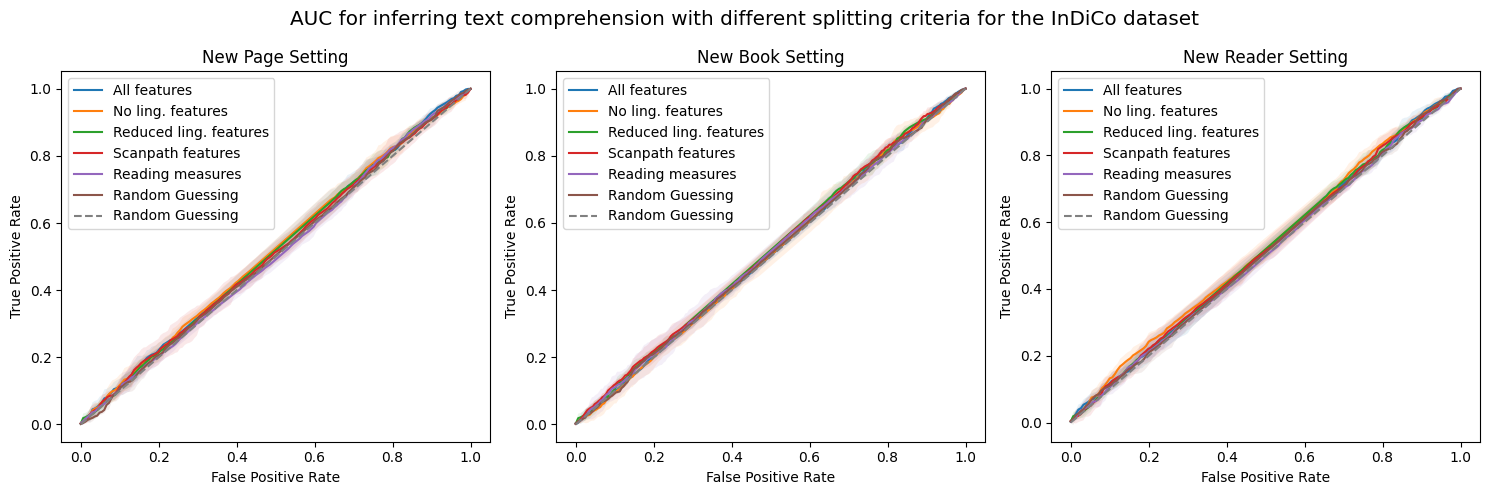

In [16]:
# chose nested array of the different folds for each setting
dataset = "InDiCo"
# all features
version = 's1_rm1_lf1'
s1_rm1_lf1_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm1_lf1_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm1_lf1_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm1_lf1_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm1_lf1_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm1_lf1_fpr_book = all_data[(dataset, version)]['fpr_book']
# without linguistic features
version = 's1_rm1_lf0'
s1_rm1_lf0_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm1_lf0_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm1_lf0_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm1_lf0_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm1_lf0_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm1_lf0_fpr_book = all_data[(dataset, version)]['fpr_book']
# with reduced linguistic features (pos and content word)
version = 's1_rm1_lf1_pos_cont'
s1_rm1_lf1_pos_cont_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm1_lf1_pos_cont_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm1_lf1_pos_cont_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm1_lf1_pos_cont_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm1_lf1_pos_cont_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm1_lf1_pos_cont_fpr_book = all_data[(dataset, version)]['fpr_book']

# Ablation study
# only sequential data
# without linguistic features
version = 's1_rm0_lf0'
s1_rm0_lf0_tpr_page = all_data[(dataset, version)]['tpr_page']
s1_rm0_lf0_fpr_page = all_data[(dataset, version)]['fpr_page']
s1_rm0_lf0_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s1_rm0_lf0_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s1_rm0_lf0_tpr_book = all_data[(dataset, version)]['tpr_book']
s1_rm0_lf0_fpr_book = all_data[(dataset, version)]['fpr_book']
# only reading measures
# without linguistic features
version = 's0_rm1_lf0'
s0_rm1_lf0_tpr_page = all_data[(dataset, version)]['tpr_page']
s0_rm1_lf0_fpr_page = all_data[(dataset, version)]['fpr_page']
s0_rm1_lf0_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s0_rm1_lf0_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s0_rm1_lf0_tpr_book = all_data[(dataset, version)]['tpr_book']
s0_rm1_lf0_fpr_book = all_data[(dataset, version)]['fpr_book']
# only linguistic features
# without linguistic features
version = 's0_rm0_lf1'
s0_rm0_lf1_tpr_page = all_data[(dataset, version)]['tpr_page']
s0_rm0_lf1_fpr_page = all_data[(dataset, version)]['fpr_page']
s0_rm0_lf1_tpr_subj = all_data[(dataset, version)]['tpr_subj']
s0_rm0_lf1_fpr_subj = all_data[(dataset, version)]['fpr_subj']
s0_rm0_lf1_tpr_book = all_data[(dataset, version)]['tpr_book']
s0_rm0_lf1_fpr_book = all_data[(dataset, version)]['fpr_book']

# -------------------------------------------------------------------------------

# get mean of different folds and stdv for plot
# all features
mean_tpr_page, mean_fpr_page, std_tpr_page, std_fpr_page = get_mean_stdv(s1_rm1_lf1_tpr_page, s1_rm1_lf1_fpr_page)
mean_tpr_subj, mean_fpr_subj, std_tpr_subj, std_fpr_subj = get_mean_stdv(s1_rm1_lf1_tpr_subj, s1_rm1_lf1_fpr_subj)
mean_tpr_book, mean_fpr_book, std_tpr_book, std_fpr_book = get_mean_stdv(s1_rm1_lf1_tpr_book, s1_rm1_lf1_fpr_book)
# without linguistic features
mean_tpr_page_110, mean_fpr_page_110, std_tpr_page_110, std_fpr_page_110 = get_mean_stdv(s1_rm1_lf0_tpr_page, s1_rm1_lf0_fpr_page)
mean_tpr_subj_110, mean_fpr_subj_110, std_tpr_subj_110, std_fpr_subj_110 = get_mean_stdv(s1_rm1_lf0_tpr_subj, s1_rm1_lf0_fpr_subj)
mean_tpr_book_110, mean_fpr_book_110, std_tpr_book_110, std_fpr_book_110 = get_mean_stdv(s1_rm1_lf0_tpr_book, s1_rm1_lf0_fpr_book)
# reduced linguistic features (pos, content word)
mean_tpr_page_111_reduced, mean_fpr_page_111_reduced, std_tpr_page_111_reduced, std_fpr_page_111_reduced = get_mean_stdv(s1_rm1_lf1_pos_cont_tpr_page, s1_rm1_lf1_pos_cont_fpr_page)
mean_tpr_subj_111_reduced, mean_fpr_subj_111_reduced, std_tpr_subj_111_reduced, std_fpr_subj_111_reduced = get_mean_stdv(s1_rm1_lf1_pos_cont_tpr_subj, s1_rm1_lf1_pos_cont_fpr_subj)
mean_tpr_book_111_reduced, mean_fpr_book_111_reduced, std_tpr_book_111_reduced, std_fpr_book_111_reduced = get_mean_stdv(s1_rm1_lf1_pos_cont_tpr_book, s1_rm1_lf1_pos_cont_fpr_book)
# only sequential data
mean_tpr_page_100, mean_fpr_page_100, std_tpr_page_100, std_fpr_page_100 = get_mean_stdv(s1_rm0_lf0_tpr_page, s1_rm0_lf0_fpr_page)
mean_tpr_subj_100, mean_fpr_subj_100, std_tpr_subj_100, std_fpr_subj_100 = get_mean_stdv(s1_rm0_lf0_tpr_subj, s1_rm0_lf0_fpr_subj)
mean_tpr_book_100, mean_fpr_book_100, std_tpr_book_100, std_fpr_book_100 = get_mean_stdv(s1_rm0_lf0_tpr_book, s1_rm0_lf0_fpr_book)
# only reading measures
mean_tpr_page_010, mean_fpr_page_010, std_tpr_page_010, std_fpr_page_010 = get_mean_stdv(s0_rm1_lf0_tpr_page, s0_rm1_lf0_fpr_page)
mean_tpr_subj_010, mean_fpr_subj_010, std_tpr_subj_010, std_fpr_subj_010 = get_mean_stdv(s0_rm1_lf0_tpr_subj, s0_rm1_lf0_fpr_subj)
mean_tpr_book_010, mean_fpr_book_010, std_tpr_book_010, std_fpr_book_010 = get_mean_stdv(s0_rm1_lf0_tpr_book, s0_rm1_lf0_fpr_book)
# only linguistic features
mean_tpr_page_001, mean_fpr_page_001, std_tpr_page_001, std_fpr_page_001 = get_mean_stdv(s0_rm0_lf1_tpr_page, s0_rm0_lf1_fpr_page)
mean_tpr_subj_001, mean_fpr_subj_001, std_tpr_subj_001, std_fpr_subj_001 = get_mean_stdv(s0_rm0_lf1_tpr_subj, s0_rm0_lf1_fpr_subj)
mean_tpr_book_001, mean_fpr_book_001, std_tpr_book_001, std_fpr_book_001 = get_mean_stdv(s0_rm0_lf1_tpr_book, s0_rm0_lf1_fpr_book)

# -----------------------------------------------

# Create a figure with three subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
st = fig.suptitle("AUC for inferring text comprehension with different splitting criteria for the InDiCo dataset", fontsize="x-large")

# Plot for page setting --------------------------
# all features
axs[0].fill_between(mean_fpr_page, mean_tpr_page - std_tpr_page, mean_tpr_page + std_tpr_page, alpha=0.1)
axs[0].plot(mean_fpr_page, mean_tpr_page, label='All features')
# no linguistic features
axs[0].fill_between(mean_fpr_page_110, mean_tpr_page_110 - std_tpr_page_110, mean_tpr_page_110 + std_tpr_page_110, alpha=0.1)
axs[0].plot(mean_fpr_page_110, mean_tpr_page_110, label='No ling. features')
# reduced linguistic features (pos, content word)
axs[0].fill_between(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced - std_tpr_subj_111_reduced, mean_tpr_subj_111_reduced + std_tpr_subj_111_reduced, alpha=0.1)
axs[0].plot(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced, label='Reduced ling. features')
# only sequential data
axs[0].fill_between(mean_fpr_page_100, mean_tpr_page_100 - std_tpr_page_100, mean_tpr_page_100 + std_tpr_page_100, alpha=0.1)
axs[0].plot(mean_fpr_page_100, mean_tpr_page_100, label='Scanpath features')
# only reading measures
axs[0].fill_between(mean_fpr_page_010, mean_tpr_page_010 - std_tpr_page_010, mean_tpr_page_010 + std_tpr_page_010, alpha=0.1)
axs[0].plot(mean_fpr_page_010, mean_tpr_page_010, label='Reading measures')
# only linguistic features
axs[0].fill_between(mean_fpr_page_001, mean_tpr_page_001 - std_tpr_page_001, mean_tpr_page_001 + std_tpr_page_001, alpha=0.1)
axs[0].plot(mean_fpr_page_001, mean_tpr_page_001, label='Random Guessing')
# random guessing
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('New Page Setting')
axs[0].legend()

# Plot for book setting ---------------------------------
# all features
axs[1].fill_between(mean_fpr_book, mean_tpr_book - std_tpr_book, mean_tpr_book + std_tpr_book, alpha=0.1)
axs[1].plot(mean_fpr_book, mean_tpr_book, label='All features')
# no linguistic features
axs[1].fill_between(mean_fpr_book_110, mean_tpr_book_110 - std_tpr_book_110, mean_tpr_book_110 + std_tpr_book_110, alpha=0.1)
axs[1].plot(mean_fpr_book_110, mean_tpr_book_110, label='No ling. features')
# reduced linguistic features (pos, content word)
axs[1].fill_between(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced - std_tpr_subj_111_reduced, mean_tpr_subj_111_reduced + std_tpr_subj_111_reduced, alpha=0.1)
axs[1].plot(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced, label='Reduced ling. features')
# only sequential data
axs[1].fill_between(mean_fpr_book_100, mean_tpr_book_100 - std_tpr_book_100, mean_tpr_book_100 + std_tpr_book_100, alpha=0.1)
axs[1].plot(mean_fpr_book_100, mean_tpr_book_100, label='Scanpath features')
# only reading measures
axs[1].fill_between(mean_fpr_book_010, mean_tpr_book_010 - std_tpr_book_010, mean_tpr_book_010 + std_tpr_book_010, alpha=0.1)
axs[1].plot(mean_fpr_book_010, mean_tpr_book_010, label='Reading measures')
# only linguistic features
axs[1].fill_between(mean_fpr_book_001, mean_tpr_book_001 - std_tpr_book_001, mean_tpr_book_001 + std_tpr_book_001, alpha=0.1)
axs[1].plot(mean_fpr_book_001, mean_tpr_book_001, label='Random Guessing')
# random guessing
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('New Book Setting')
axs[1].legend()

# Plot for subj setting -----------------------------
# all features
axs[2].fill_between(mean_fpr_subj, mean_tpr_subj - std_tpr_subj, mean_tpr_subj + std_tpr_subj, alpha=0.1)
axs[2].plot(mean_fpr_subj, mean_tpr_subj, label='All features')
# no linguistic features
axs[2].fill_between(mean_fpr_subj_110, mean_tpr_subj_110 - std_tpr_subj_110, mean_tpr_subj_110 + std_tpr_subj_110, alpha=0.1)
axs[2].plot(mean_fpr_subj_110, mean_tpr_subj_110, label='No ling. features')
# reduced linguistic features (pos, content word)
axs[2].fill_between(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced - std_tpr_subj_111_reduced, mean_tpr_subj_111_reduced + std_tpr_subj_111_reduced, alpha=0.1)
axs[2].plot(mean_fpr_subj_111_reduced, mean_tpr_subj_111_reduced, label='Reduced ling. features')
# only sequential data
axs[2].fill_between(mean_fpr_subj_100, mean_tpr_subj_100 - std_tpr_subj_100, mean_tpr_subj_100 + std_tpr_subj_100, alpha=0.1)
axs[2].plot(mean_fpr_subj_100, mean_tpr_subj_100, label='Scanpath features')
# only reading measures
axs[2].fill_between(mean_fpr_subj_010, mean_tpr_subj_010 - std_tpr_subj_010, mean_tpr_subj_010 + std_tpr_subj_010, alpha=0.1)
axs[2].plot(mean_fpr_subj_010, mean_tpr_subj_010, label='Reading measures')
# only linguistic features
axs[2].fill_between(mean_fpr_subj_001, mean_tpr_subj_001 - std_tpr_subj_001, mean_tpr_subj_001 + std_tpr_subj_001, alpha=0.1)
axs[2].plot(mean_fpr_subj_001, mean_tpr_subj_001, label='Random Guessing')
# random guessing
axs[2].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('New Reader Setting')
axs[2].legend()



# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
